In [1]:
%matplotlib inline
from selenium import webdriver
from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import glob
import datetime
from bs4 import BeautifulSoup as bs
import requests as req
from urllib.request import urlopen
from lxml import etree
path = os.getcwd()

In [12]:
all_files = glob.glob(path + '/data' + "/schedule*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [13]:
frame.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Wed Feb 1 2012,7:00p,Washington Wizards,103,Orlando Magic,109,Box Score,NaN,18846,NaN
1,Wed Feb 1 2012,7:00p,Chicago Bulls,82,Philadelphia 76ers,98,Box Score,NaN,18325,NaN
2,Wed Feb 1 2012,7:30p,Toronto Raptors,64,Boston Celtics,100,Box Score,NaN,18624,NaN
3,Wed Feb 1 2012,7:30p,Detroit Pistons,96,New Jersey Nets,99,Box Score,NaN,10504,NaN
4,Wed Feb 1 2012,8:00p,Oklahoma City Thunder,95,Dallas Mavericks,86,Box Score,NaN,20316,NaN


In [14]:
name = pd.read_csv(path + '/data/name_abb.csv')
name_dict = dict(zip(name['Franchise'],name['Abbreviation/Acronym']))

In [15]:
s_team_sorted = frame.sort_values(by = ['Home/Neutral'])

In [16]:
s_team_sorted['Date_c'] = s_team_sorted['Date'].str[4:]

In [17]:
s_team_sorted['Home_abb'] = [name_dict[n] for n in s_team_sorted['Home/Neutral']]

In [18]:
datelist = []
for date in s_team_sorted['Date_c']:
    datelist.append(datetime.datetime.strptime(date, '%b %d %Y'))

In [19]:
s_team_sorted['Date_fmt'] = datelist
s_team_sorted['Date_shifted'] = s_team_sorted['Date_fmt'] + datetime.timedelta(days=1)
s_team_sorted['Date_shifted'] = [datetime.datetime.strftime(d, "%m-%d-%Y") for d in s_team_sorted['Date_shifted']]

In [20]:
teamid_lookup = pd.read_json(path + '/data/' + 'nba_teamid.json')

In [21]:
#add season
season = []
for gameday in s_team_sorted['Date_fmt']:
    if datetime.date(2006,10,1) <= gameday.date() <= datetime.date(2007,7,1):
        season.append('2006-07')
    elif datetime.date(2007,10,1) <= gameday.date() <= datetime.date(2008,7,1):
        season.append('2007-08')
    elif datetime.date(2008,10,1) <= gameday.date() <= datetime.date(2009,7,1):
        season.append('2008-09')
    elif datetime.date(2009,10,1) <= gameday.date() <= datetime.date(2010,7,1):
        season.append('2009-10')
    elif datetime.date(2010,10,1) <= gameday.date() <= datetime.date(2011,7,1):
        season.append('2010-11')
    elif datetime.date(2011,10,1) <= gameday.date() <= datetime.date(2012,7,1):
        season.append('2011-12')        
    elif datetime.date(2012,10,1) <= gameday.date() <= datetime.date(2013,7,1):
        season.append('2012-13')       
    elif datetime.date(2013,10,1) <= gameday.date() <= datetime.date(2014,7,1):
        season.append('2013-14')    
    elif datetime.date(2014,10,1) <= gameday.date() <= datetime.date(2015,7,1):
        season.append('2014-15')
    elif datetime.date(2015,10,1) <= gameday.date() <= datetime.date(2016,7,1):
        season.append('2015-16')     
    elif datetime.date(2016,10,1) <= gameday.date() <= datetime.date(2017,7,1):
        season.append('2016-17')  
    elif datetime.date(2017,10,1) <= gameday.date() <= datetime.date(2018,7,1):
        season.append('2017-18')
    elif datetime.date(2018,10,1) <= gameday.date() <= datetime.date(2019,7,1):
        season.append('2018-19')
s_team_sorted['Season'] = season

In [22]:
year = ['2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16',
       '2016-17','2017-18']
TeamID = dict(zip(teamid_lookup['abbreviation'], teamid_lookup['teamId']))

In [23]:
#driving the browser
year = ['2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16',
       '2016-17','2017-18']

  # Optional argument, if not specified will search path.

In [24]:
s_team_sorted_0708 = s_team_sorted[s_team_sorted.Season != '2006-07']

# Parsing Advanced Data From 07-19

        

In [2]:
# get the data ready
s_07_19 = s_team_sorted[s_team_sorted.Season != '2006-07']
s_07_19 = s_07_19.sort_values(by = ['Season'])

NameError: name 's_team_sorted' is not defined

I tried to use proxy, but it was not stable. I ended up using VPN.

In [17]:
s_07_19.shape

(15625, 15)

In [17]:
import requests
from lxml.html import fromstring
def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:1000]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            #Grabbing IP and corresponding PORT
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return proxies

In [2]:
adv = pd.read_csv(path+'/data/s_07_19_m.csv')

In [3]:
adv_reg = adv.loc[adv.RegularSeason == 1]

In [11]:
adv_reg.shape

(14636, 18)

In [5]:
# setting up
name = pd.read_csv(path + '/data/name_abb.csv')
name_dict = dict(zip(name['Franchise'],name['Abbreviation/Acronym']))
teamid_lookup = pd.read_json(path + '/data/' + 'nba_teamid.json')
TeamID = dict(zip(teamid_lookup['abbreviation'], teamid_lookup['teamId']))

In [6]:
def statsParser(table,team,gameday):
    lineups = []
    stats = []
#     print(table.text)
    for line_id, lines in enumerate(table.text.split('\n')):
#         print(lines)
        if line_id == 0:
             columns_names = lines.split(' ')[1:]
        elif('LINEUPS' in lines) & (line_id >= 2):
#             print(lines)
            break
        else:
            line = lines.split(team)
            lineups.append(line[0])
            try:
                stats.append(line[1].split(' ')[1:])
            except:
                continue
    teamls = pd.Series([team for i in range(len(stats))])
    gamedayls = pd.Series([gameday for i in range(len(stats))])
#     print(len(stats[0]))
    db = pd.DataFrame({'lineup':lineups[0:len(stats)],
                   'GP':[i[0] for i in stats],
                   'MIN':[i[1] for i in stats],
                   'OFFRTG':[i[2] for i in stats],
                   'DEFRTG':[i[3] for i in stats],
                   'NETRTG':[i[4] for i in stats],
                   'AST%':[i[5] for i in stats],
                   'AST/TO':[i[6] for i in stats],
                   'AST RATIO':[i[7] for i in stats],
                   'OREB%':[i[8] for i in stats],
                   'DREB%':[i[9] for i in stats],
                   'REB%':[i[10] for i in stats],
                   'TO RATIO':[i[11] for i in stats],
                   'EFG%':[i[12] for i in stats],
                   'TS%':[i[13] for i in stats],
                   'PACE':[i[14] for i in stats],
                   'PIE':[i[15] for i in stats],
                   'TEAM':teamls,
                   'GAMEDAY':gamedayls
                    })
    return db

In [10]:
# scrape the advanced statistics for nba lineups from 2007 to 2019.
# we want the advanced data
import time
import random
import sys

start = init = 14636
options2 = webdriver.ChromeOptions()
driver = webdriver.Chrome('/Users/yezichang/Desktop/NYU/1001/Project/chromedriver')
end = init + 1500

db_init_adv = pd.DataFrame({'lineup':[],
                   'GP':[],
                   'MIN':[],
                   'OFFRTG':[],
                   'DEFRTG':[],
                   'NETRTG':[],
                   'AST%':[],
                   'AST/TO':[],
                   'AST RATIO':[],
                   'OREB%':[],
                   'DREB%':[],
                   'REB%':[],
                   'TO RATIO':[],
                   'EFG%':[],
                   'TS%':[],
                   'PACE':[],
                   'PIE':[],
                   'TEAM':[],
                   'GAMEDAY':[]
                    })
for index, row in adv_reg[start:end].iterrows():
    
    start += 1
    try:
        # pauase the program for a while
        pause = 5*(random.random())
        print('THIS IS NUMBER ', start)
        year = row['Season']
        teamid = str(TeamID[row['Home_abb']])
        date = '&DateFrom='+str(row['Date_c']).replace(' ','%2F')+'&DateTo='+str(row['Date_shifted']).replace('-','%2F')

        url = 'https://stats.nba.com/lineups/advanced/?Season='+year+'&TeamID='+teamid+date
        print("Request #%d"%start)

        try:
            driver.get(url)
            time.sleep(2)
            table = driver.find_element_by_class_name("nba-stat-table")
            print(table)
            if start == 1:
                db_init_adv = statsParser(table,team = row['Home_abb'] ,gameday = row['Date_c'])
                print(db_init_adv.shape)
            else:
                db_new = statsParser(table,team = row['Home_abb'] ,gameday = row['Date_c'])
                db_init_adv = pd.concat([db_init_adv,db_new],axis = 0)
                print(db_init_adv.shape)
        except:
            db_init_adv = db_init_adv
            print('Error!')
            print(row['Home_abb'])
            print(url)
            print(row['Date_c'])
            time.sleep(pause)

#     this allows me pause the program
    except KeyboardInterrupt:
        print ('\nPausing...  (Hit ENTER to continue, type quit to exit.)')
        try:
            response = input()
            if response == 'quit':
                break
            print ('Resuming...')
        except KeyboardInterrupt:
            print ('Resuming...')

16136


In [12]:
db_init_adv.to_csv(path+'/data/lineup_advanvced_l_0719_%(track)s_%(end)s.csv' %{"track":str(init), "end": str(start)})

In [75]:
db_init_adv

,lineup,GP,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE,TEAM,GAMEDAY
0,".K. Thomas, .E. Watson, .N. Collison, .K. Dura...",1,14,77.4,87.9,-10.5,54.5,1.20,14.6,25.0,76.5,51.5,0.2,40.7,43.0,109.00,50.0,SEA,Jan 14 2008
1,".K. Thomas, .N. Collison, .L. Ridnour, .K. Dur...",1,5,112.5,88.9,23.6,25.0,0.00,9.1,33.3,66.7,50.0,0.0,50.0,45.5,82.09,63.2,SEA,Jan 14 2008
2,".K. Thomas, .W. Szczerbiak, .N. Collison, .L. ...",1,4,157.1,100.0,57.1,80.0,0.00,36.4,0.0,60.0,50.0,0.0,83.3,85.4,87.65,82.5,SEA,Jan 14 2008
3,".W. Szczerbiak, .C. Wilcox, .L. Ridnour, .K. D...",1,4,120.0,133.3,-13.3,40.0,1.00,14.3,40.0,50.0,44.4,0.2,60.0,60.0,120.00,21.6,SEA,Jan 14 2008
4,".W. Szczerbiak, .N. Collison, .L. Ridnour, .D....",1,4,88.9,170.0,-81.1,100,1.33,28.6,25.0,100,50.0,0.3,57.1,53.8,113.06,7.0,SEA,Jan 14 2008
5,".K. Thomas, .W. Szczerbiak, .E. Watson, .C. Wi...",1,3,75.0,162.5,-87.5,50.0,1.00,11.1,0.0,100,40.0,0.1,50.0,51.0,122.55,11.8,SEA,Jan 14 2008
6,".W. Szczerbiak, .C. Wilcox, .N. Collison, .L. ...",1,3,120.0,66.7,53.3,50.0,1.00,10.0,80.0,66.7,75.0,0.2,28.6,38.1,82.50,75.0,SEA,Jan 14 2008
7,".E. Watson, .N. Collison, .D. West, .K. Durant...",1,2,75.0,133.3,-58.3,0.0,0.00,0.0,66.7,33.3,50.0,0.3,0.0,31.5,75.79,0.0,SEA,Jan 14 2008
8,".K. Thomas, .W. Szczerbiak, .C. Wilcox, .L. Ri...",1,2,166.7,66.7,100.0,25.0,0.00,14.3,0.0,100,75.0,0.0,80.0,85.0,118.36,93.5,SEA,Jan 14 2008
9,".K. Thomas, .W. Szczerbiak, .E. Watson, .K. Du...",1,2,180.0,50.0,130.0,100,0.00,37.5,0.0,75.0,60.0,0.0,87.5,92.2,93.44,103.7,SEA,Jan 14 2008


# Error Label


In [19]:
import os

def readerr(file):
    lines = file.readlines()
    errorlabel = [0] * 15625 # number of instances attempted

    for i in range(len(lines)):
        if 'Error!' in lines[i]:
            tar = int(lines[i-1][9:]) # index of instance that went wrong
            errorlabel[tar-1] = 1
        else:
            continue

    return errorlabel


path = os.getcwd()
file = open(path + '/data/parsing_output_07-19.txt')
label = readerr(file)

In [20]:
s_07_19['Errorlabel'] = label

In [21]:
# we have about 17.2% of the game
15625 - np.sum(s_07_19['Errorlabel'])

2690

# Label the regular season

In [22]:
regularseason = []
for gameday in s_07_19['Date_fmt']:
    if datetime.date(2006,10,31) <= gameday.date() <= datetime.date(2007,4,18):
        regularseason.append(1)
    elif datetime.date(2007,10,30) <= gameday.date() <= datetime.date(2008,4,16):
        regularseason.append(1)
    elif datetime.date(2008,10,28) <= gameday.date() <= datetime.date(2009,4,16):
        regularseason.append(1)
    elif datetime.date(2009,10,27) <= gameday.date() <= datetime.date(2010,4,14):
        regularseason.append(1)
    elif datetime.date(2010,10,26) <= gameday.date() <= datetime.date(2011,4,13):
        regularseason.append(1)
    elif datetime.date(2011,12,25) <= gameday.date() <= datetime.date(2012,4,26):
        regularseason.append(1)        
    elif datetime.date(2012,10,30) <= gameday.date() <= datetime.date(2013,4,17):
        regularseason.append(1)    
    elif datetime.date(2013,10,29) <= gameday.date() <= datetime.date(2014,4,16):
        regularseason.append(1)  
    elif datetime.date(2014,10,28) <= gameday.date() <= datetime.date(2015,4,15):
        regularseason.append(1)
    elif datetime.date(2015,10,27) <= gameday.date() <= datetime.date(2016,4,13):
        regularseason.append(1)   
    elif datetime.date(2016,10,25) <= gameday.date() <= datetime.date(2017,4,12):
        regularseason.append(1)
    elif datetime.date(2017,10,17) <= gameday.date() <= datetime.date(2018,4,11):
        regularseason.append(1)
    elif datetime.date(2018,10,16) <= gameday.date() <= datetime.date(2019,4,10):
        regularseason.append(1)
    else:
        regularseason.append(0)
s_07_19['RegularSeason'] = regularseason

In [23]:
s_07_19.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes,Date_c,Home_abb,Date_fmt,Date_shifted,Season,Errorlabel,RegularSeason
8440,Mon Jan 14 2008,10:00p,Los Angeles Lakers,123,Seattle SuperSonics,121,Box Score,OT,13452,NaN,Jan 14 2008,SEA,2008-01-14,01-15-2008,2007-08,0,1
15213,Fri Nov 16 2007,8:00p,Houston Rockets,84,San Antonio Spurs,90,Box Score,NaN,18797,NaN,Nov 16 2007,SAS,2007-11-16,11-17-2007,2007-08,0,1
16531,Wed Dec 12 2007,7:30p,Sacramento Kings,78,Boston Celtics,90,Box Score,NaN,18624,NaN,Dec 12 2007,BOS,2007-12-12,12-13-2007,2007-08,0,1
16605,Sat Dec 22 2007,7:30p,Utah Jazz,102,Miami Heat,104,Box Score,NaN,19600,NaN,Dec 22 2007,MIA,2007-12-22,12-23-2007,2007-08,0,1
3059,Wed May 28 2008,8:30p,Detroit Pistons,102,Boston Celtics,106,Box Score,NaN,18624,NaN,May 28 2008,BOS,2008-05-28,05-29-2008,2007-08,1,0


In [24]:
s_07_19.to_csv(path+'/data/s_07_19_m.csv')

In [ ]:
db_init.to_csv(path+'/data/lineup_traditional_0719_again.csv')

In [63]:
l = ['.K. Thomas, .E. Watson, .N. Collison, .K. Durant, .J. Green ', '.K. Thomas, .N. Collison, .L. Ridnour, .K. Durant, .J. Green ', '.K. Thomas, .W. Szczerbiak, .N. Collison, .L. Ridnour, .J. Green ', '.W. Szczerbiak, .C. Wilcox, .L. Ridnour, .K. Durant, .J. Green ', '.W. Szczerbiak, .N. Collison, .L. Ridnour, .D. West, .J. Petro ', '.K. Thomas, .W. Szczerbiak, .E. Watson, .C. Wilcox, .K. Durant ', '.W. Szczerbiak, .C. Wilcox, .N. Collison, .L. Ridnour, .K. Durant ', '.E. Watson, .N. Collison, .D. West, .K. Durant, .J. Green ', '.K. Thomas, .W. Szczerbiak, .C. Wilcox, .L. Ridnour, .D. West ', '.K. Thomas, .W. Szczerbiak, .E. Watson, .K. Durant, .J. Green ', '.K. Thomas, .W. Szczerbiak, .E. Watson, .N. Collison, .K. Durant ', '.W. Szczerbiak, .E. Watson, .N. Collison, .K. Durant, .J. Green ', '.K. Thomas, .E. Watson, .C. Wilcox, .K. Durant, .J. Green ', '.K. Thomas, .W. Szczerbiak, .C. Wilcox, .L. Ridnour, .K. Durant ', '.W. Szczerbiak, .E. Watson, .C. Wilcox, .N. Collison, .J. Green ', '.E. Watson, .C. Wilcox, .N. Collison, .K. Durant, .J. Green ', '.E. Watson, .D. Wilkins, .J. Petro, .K. Durant, .J. Green ', '.K. Thomas, .C. Wilcox, .L. Ridnour, .K. Durant, .J. Green ', '.K. Thomas, .E. Watson, .D. Wilkins, .K. Durant, .J. Green ', '.K. Thomas, .W. Szczerbiak, .E. Watson, .C. Wilcox, .L. Ridnour ', '.K. Thomas, .W. Szczerbiak, .L. Ridnour, .D. West, .J. Petro ', '.K. Thomas, .W. Szczerbiak, .N. Collison, .L. Ridnour, .K. Durant ', '.W. Szczerbiak, .C. Wilcox, .N. Collison, .L. Ridnour, .J. Green ', '']

'.K. Thomas, .E. Watson, .N. Collison, .K. Durant, .J. Green '

24

In [8]:
advanced_files = glob.glob(path + '/data/' + 'lineup_advanvced_*.csv')

ls = []
for file in advanced_files:
    df = pd.read_csv(file, index_col=None, header=0)
    ls.append(df)

advanced_df = pd.concat(ls, axis = 0, ignore_index = True)
advanced_df.to_csv(path+'/data/lineup_advanced_0719.csv')

In [9]:
traditional_df = pd.read_csv(path + '/data/lineup_traditional_0719_again_0_11946.csv')

In [13]:
merg = pd.merge(traditional_df, advanced_df, left_on = ['GAMEDAY','TEAM'], right_on = ['GAMEDAY','TEAM'])

In [16]:
temp = merg.groupby(['TEAM','GAMEDAY'],as_index = False)

TEAM  GAMEDAY    
ATL   Apr 10 2009    289
      Apr 10 2015    400
      Apr 11 2017    625
      Apr 13 2015    529
      Apr 14 2009    625
      Apr 14 2014    289
      Apr 2 2014     441
      Apr 4 2009     121
      Apr 4 2012     225
      Apr 4 2014     289
      Apr 6 2012     361
      Apr 7 2016     529
      Apr 9 2010     625
      Dec 1 2010     225
      Dec 11 2010    256
      Dec 13 2016    529
      Dec 15 2014    441
      Dec 17 2010    324
      Dec 19 2008    324
      Dec 2 2009     324
      Dec 2 2016     625
      Dec 20 2010    324
      Dec 21 2015    625
      Dec 22 2010    225
      Dec 23 2014    625
      Dec 23 2015    625
      Dec 28 2011    529
      Dec 28 2013    625
      Dec 29 2008    625
      Dec 29 2010    144
                    ... 
WAS   Nov 10 2010    289
      Nov 11 2016    625
      Nov 12 2010    625
      Nov 12 2014    324
      Nov 14 2009    529
      Nov 15 2014    196
      Nov 16 2013    225
      Nov 17 2016    289
      N

# ErrorLabel 2

In [2]:
data_path = '/Users/yezichang/Desktop/NYU/1001/Project/NBA-Analytics/data/'

In [5]:
adv_total = pd.read_csv(data_path + 'lineup_advanced_0719.csv')
schedule_total = pd.read_csv(data_path + 's_07_19_m.csv')
adv_total_gb = adv_total.groupby(by = ['GAMEDAY','TEAM'], as_index = True)
# existing games
existing_games = adv_total_gb.groups
existing_games_key = list(existing_games.keys())
# break them into two lists: gamedate and team
gamedate_check = []
team_check = []
exist_check = []
for date, team in existing_games_key:
    gamedate_check.append(date)
    team_check.append(team)
    exist_check.append(1)
    
check = pd.DataFrame({'date_check':gamedate_check, 
                      'team_check': team_check, 
                      'exist_check': exist_check})

schedule_check = schedule_total.merge(check, how = 'left', 
                                      left_on = ['Date_c','Home_abb'], 
                                      right_on = ['date_check','team_check'])

In [10]:
schedule_check.to_csv(data_path + 'lineup_advanced_exist_check.csv')

In [11]:
schedule_check.columns

Index(['Unnamed: 0', 'Date', 'Start (ET)', 'Visitor/Neutral', 'PTS',
       'Home/Neutral', 'PTS.1', 'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Notes',
       'Date_c', 'Home_abb', 'Date_fmt', 'Date_shifted', 'Season',
       'Errorlabel', 'RegularSeason', 'date_check', 'team_check',
       'exist_check'],
      dtype='object')

In [26]:
# analyze which years have more missing values
schedule_adv_check_by_season = schedule_check.groupby('Season')
temp3 = schedule_adv_check_by_season.exist_check.sum()
temp4 = schedule_adv_check_by_season.Season.count()

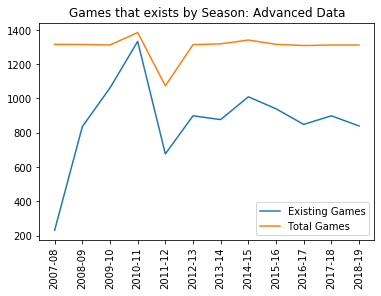

In [44]:
plt.plot(temp3, label = 'Existing Games')
plt.plot(temp4, label = 'Total Games')
plt.xticks(rotation = 90)
plt.title('Games that exists by Season: Advanced Data')
plt.legend()